## Credit Card Fraud Detection
**In this project you will predict fraudulent credit card transactions with the help of Machine learning models**.
<br></br>**Business Problem** :For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

In [1]:
#Importing the libraries we will need for the project
import pandas as pd #working with dataframes
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
from sklearn.preprocessing import StandardScaler, RobustScaler #scale data
from sklearn.model_selection import train_test_split, GridSearchCV #for splitting data
from imblearn.under_sampling import RandomUnderSampler #for undersampling 
from imblearn.over_sampling import RandomOverSampler #for oversampling
from imblearn.over_sampling import SMOTE,ADASYN #for smote
from imblearn.under_sampling import NearMiss  #near miss undersampling
from sklearn import tree # for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report # classification report: precision, recall
from sklearn.linear_model import LogisticRegression #linear regression
from sklearn.svm import SVC #svc
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.preprocessing import PowerTransformer
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
import xgboost as xgb #XGBoost
import numpy as np #To math 
import seaborn as sns #to visualization
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [2]:
#Importing the Dataset
df_credit = pd.read_csv("creditcard.csv")

In [3]:
#Checking the dataset head
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#looking the type and searching for null values
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Checking the stats 
df_credit[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


Distribuition of Normal(0) and Frauds(1): 
0    284315
1       492
Name: Class, dtype: int64


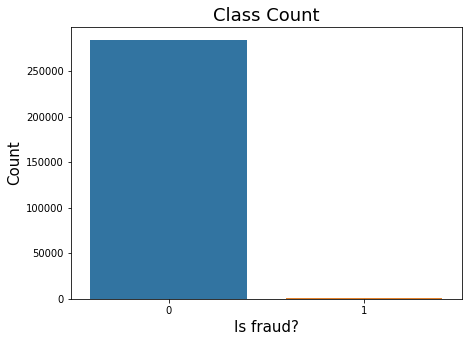

In [6]:
#Lets start looking the difference by Normal and Fraud transactions
print("Distribuition of Normal(0) and Frauds(1): ")
print(df_credit["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_credit['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [7]:
#Checking the percentage of the classes
classes=df_credit['Class'].value_counts()
normal_share=classes[0]/df_credit['Class'].count()*100
fraud_share=classes[1]/df_credit['Class'].count()*100

In [8]:
#Percentage of non-fraudulent cases
normal_share

99.82725143693798

In [9]:
#percentage of fraudulent cass
fraud_share

0.1727485630620034

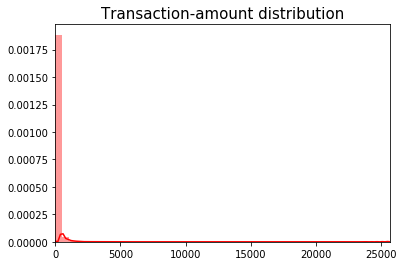

In [10]:
#checking the tansaction ammount distributoin to check how skewed the variable is
amount_val = df_credit['Amount'].values
time_val = df_credit['Time'].values
sns.distplot(amount_val, color='r')
plt.title('Transaction-amount distribution', fontsize=15)
plt.xlim([min(amount_val), max(amount_val)])

plt.show()

(0.0, 172792.0)

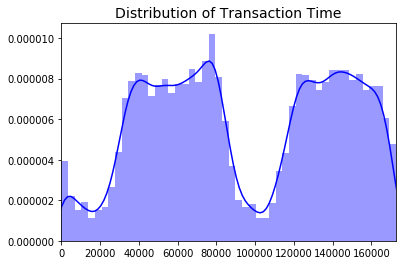

In [11]:
#Checking the distribution of transaction time to check how skewed teh variable is
sns.distplot(time_val,color='b')
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlim([min(time_val), max(time_val)])


In [12]:
#Creating two new colums with the information of time in hours and min
timedelta = pd.to_timedelta(df_credit['Time'], unit='s')
df_credit['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df_credit['Time_hour'] = (timedelta.dt.components.hours).astype(int)

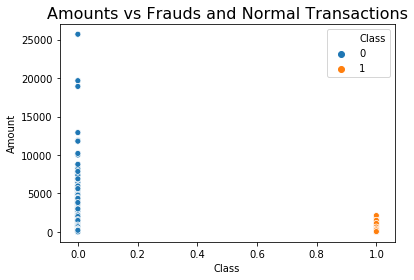

In [13]:
#Checking the Amount distribution between FRAUD and NON-FRAUD transactions
ax = sns.scatterplot(y="Amount", x="Class",
                data=df_credit,hue='Class')
plt.title("Amounts vs Frauds and Normal Transactions",fontsize=16)
plt.show()

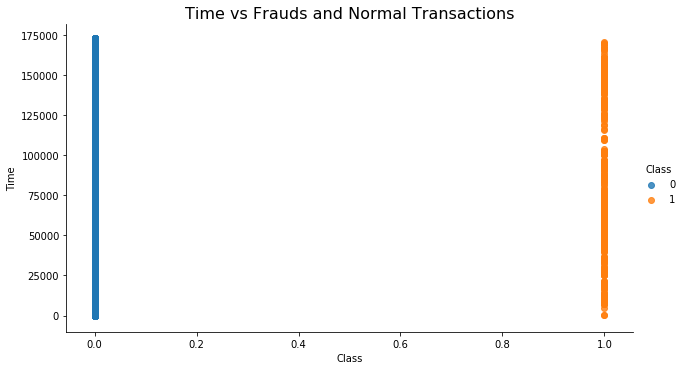

In [14]:
#Looking the Time distribution between FRAUD and NON-FRAUD transactions
ax = sns.lmplot(y="Time", x="Class", fit_reg=False,aspect=1.8,
                data=df_credit, hue='Class')
plt.title("Time vs Frauds and Normal Transactions",fontsize=16)
plt.show()

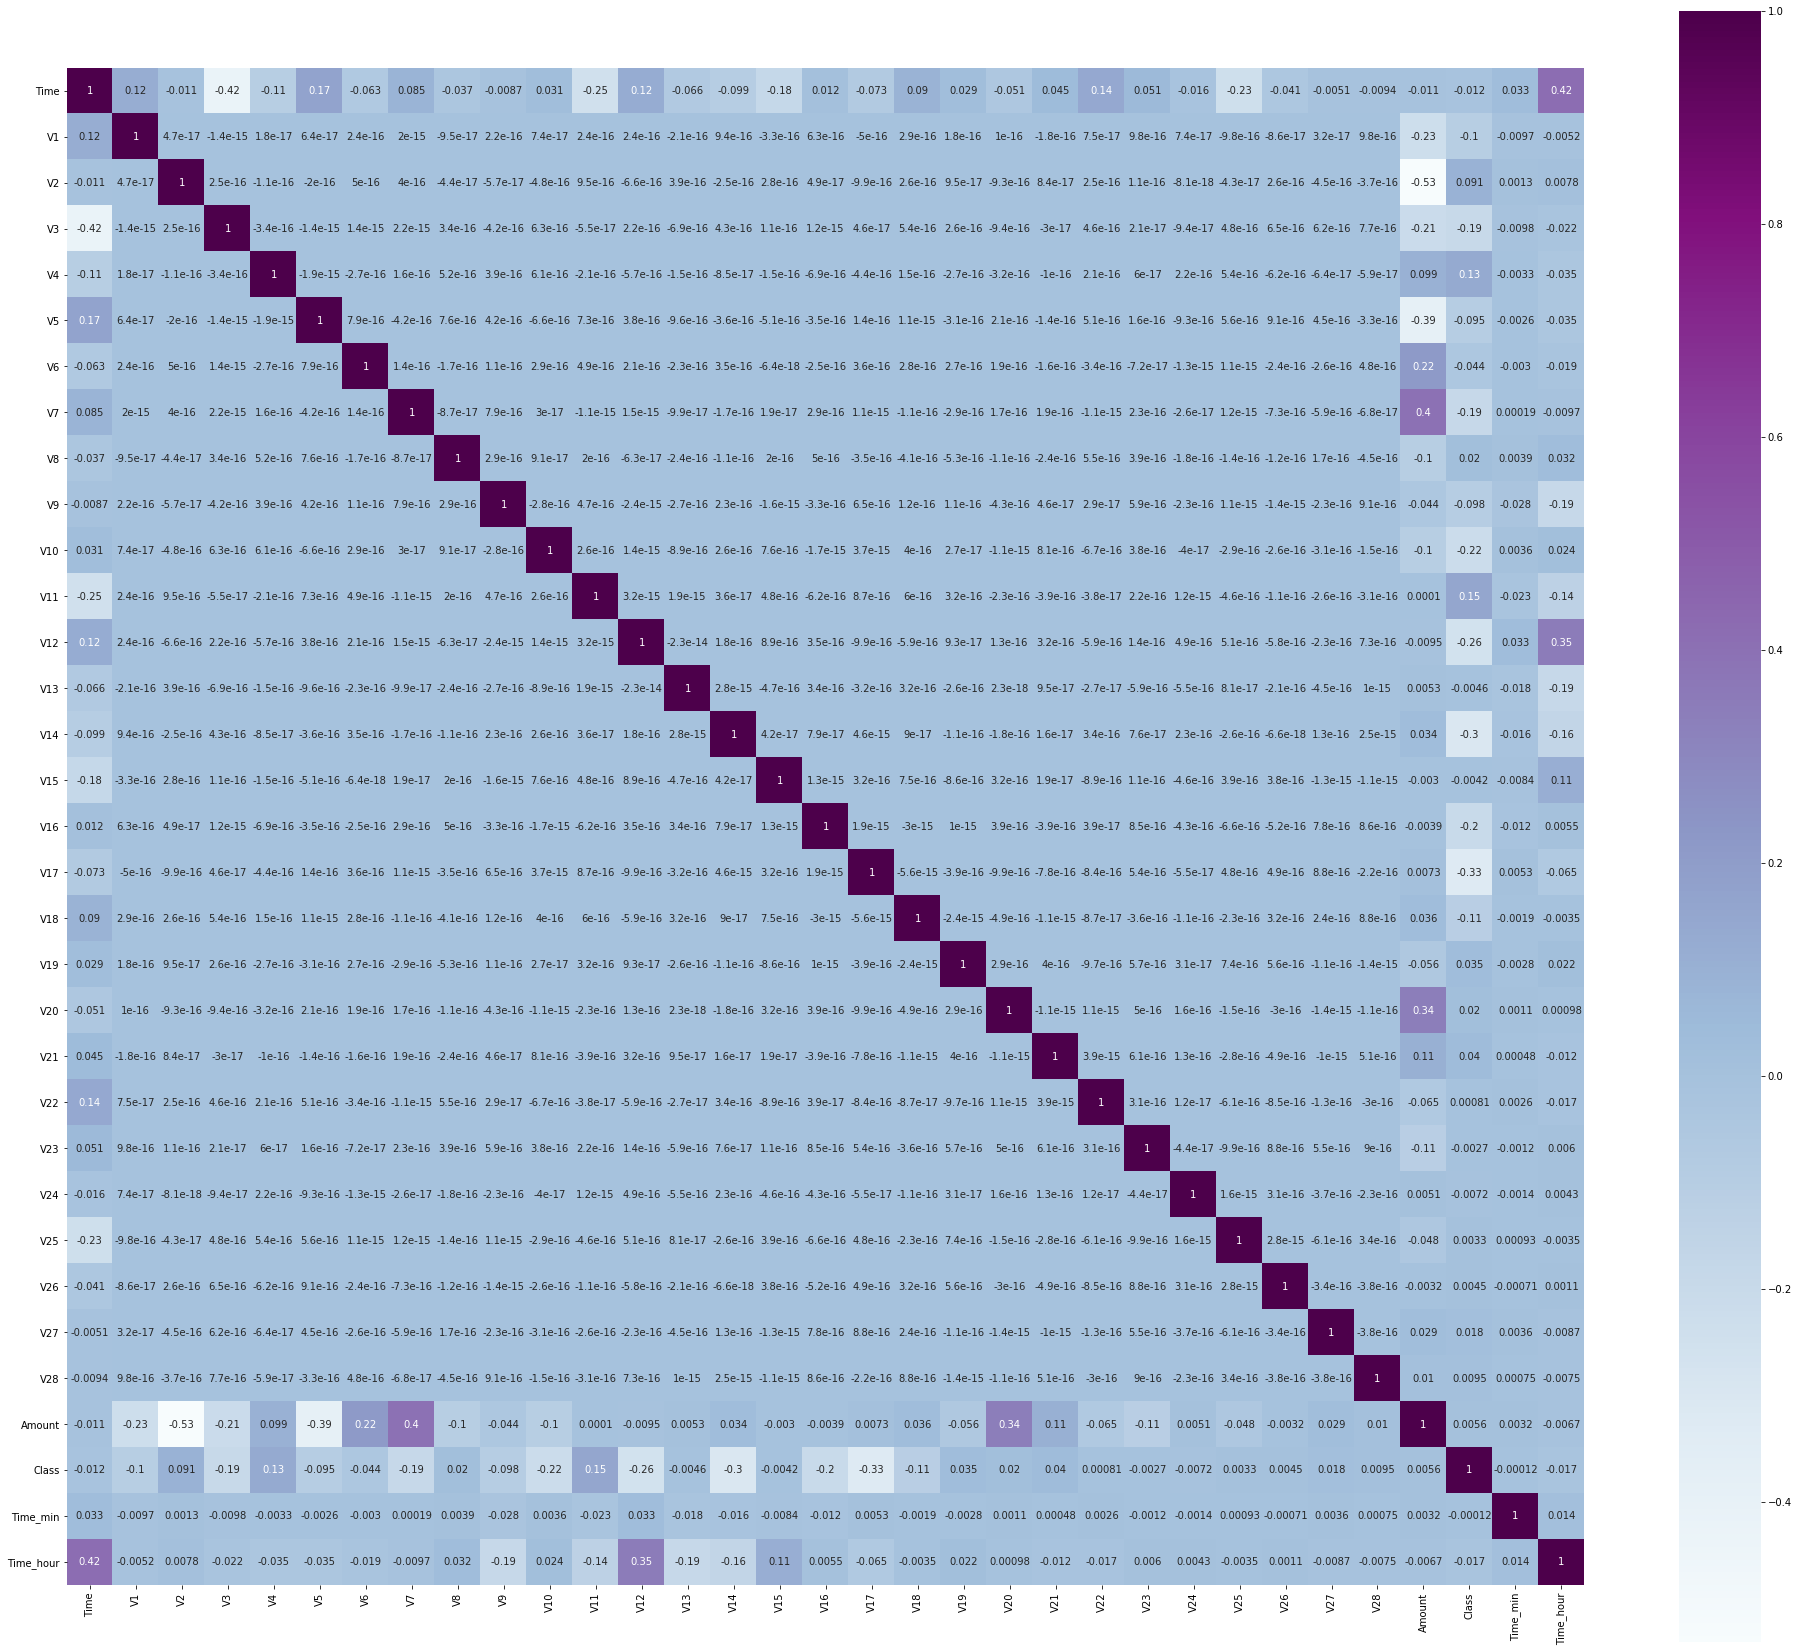

In [15]:
#plotting the heatmap to check corelaiion between the variables
colormap = plt.cm.BuPu

plt.figure(figsize=(34,30))

sns.heatmap(df_credit.corr(),vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

In [16]:
#droping the time column as this doesnt give any meaningful information as it has the data for the elapsed time between the first transaction in data set and other te=ransactions

df_credit=df_credit.drop("Time",axis=1)
#can also be done by reassigning dt as dt.iloc(:,2:)
df_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0


In [17]:
#Dropping the column creaeted for analysing time variable
df_credit=df_credit.drop("Time_min",axis=1)
df_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [18]:
#Dropping the column creaeted for analysing time variable
df_credit=df_credit.drop("Time_hour",axis=1)
#can also be done by reassigning dt as dt.iloc(:,2:)
df_credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Dropping columns with a strong correlation using the HeatMap

In [19]:
#drop unnecessary columns
df_credit=df_credit.drop("V7",axis=1)

df_credit.head()

,V1,V2,V3,V4,V5,V6,V8,V9,V10,V11,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.098698,0.363787,0.090794,-0.551600,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,0.085102,-0.255425,-0.166974,1.612727,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.247676,-1.514654,0.207643,0.624501,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.377436,-1.387024,-0.054952,-0.226487,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,-0.270533,0.817739,0.753074,-0.822843,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df_credit=df_credit.drop("V20",axis=1)

df_credit.head()

,V1,V2,V3,V4,V5,V6,V8,V9,V10,V11,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.098698,0.363787,0.090794,-0.551600,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,0.085102,-0.255425,-0.166974,1.612727,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.247676,-1.514654,0.207643,0.624501,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.377436,-1.387024,-0.054952,-0.226487,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,-0.270533,0.817739,0.753074,-0.822843,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


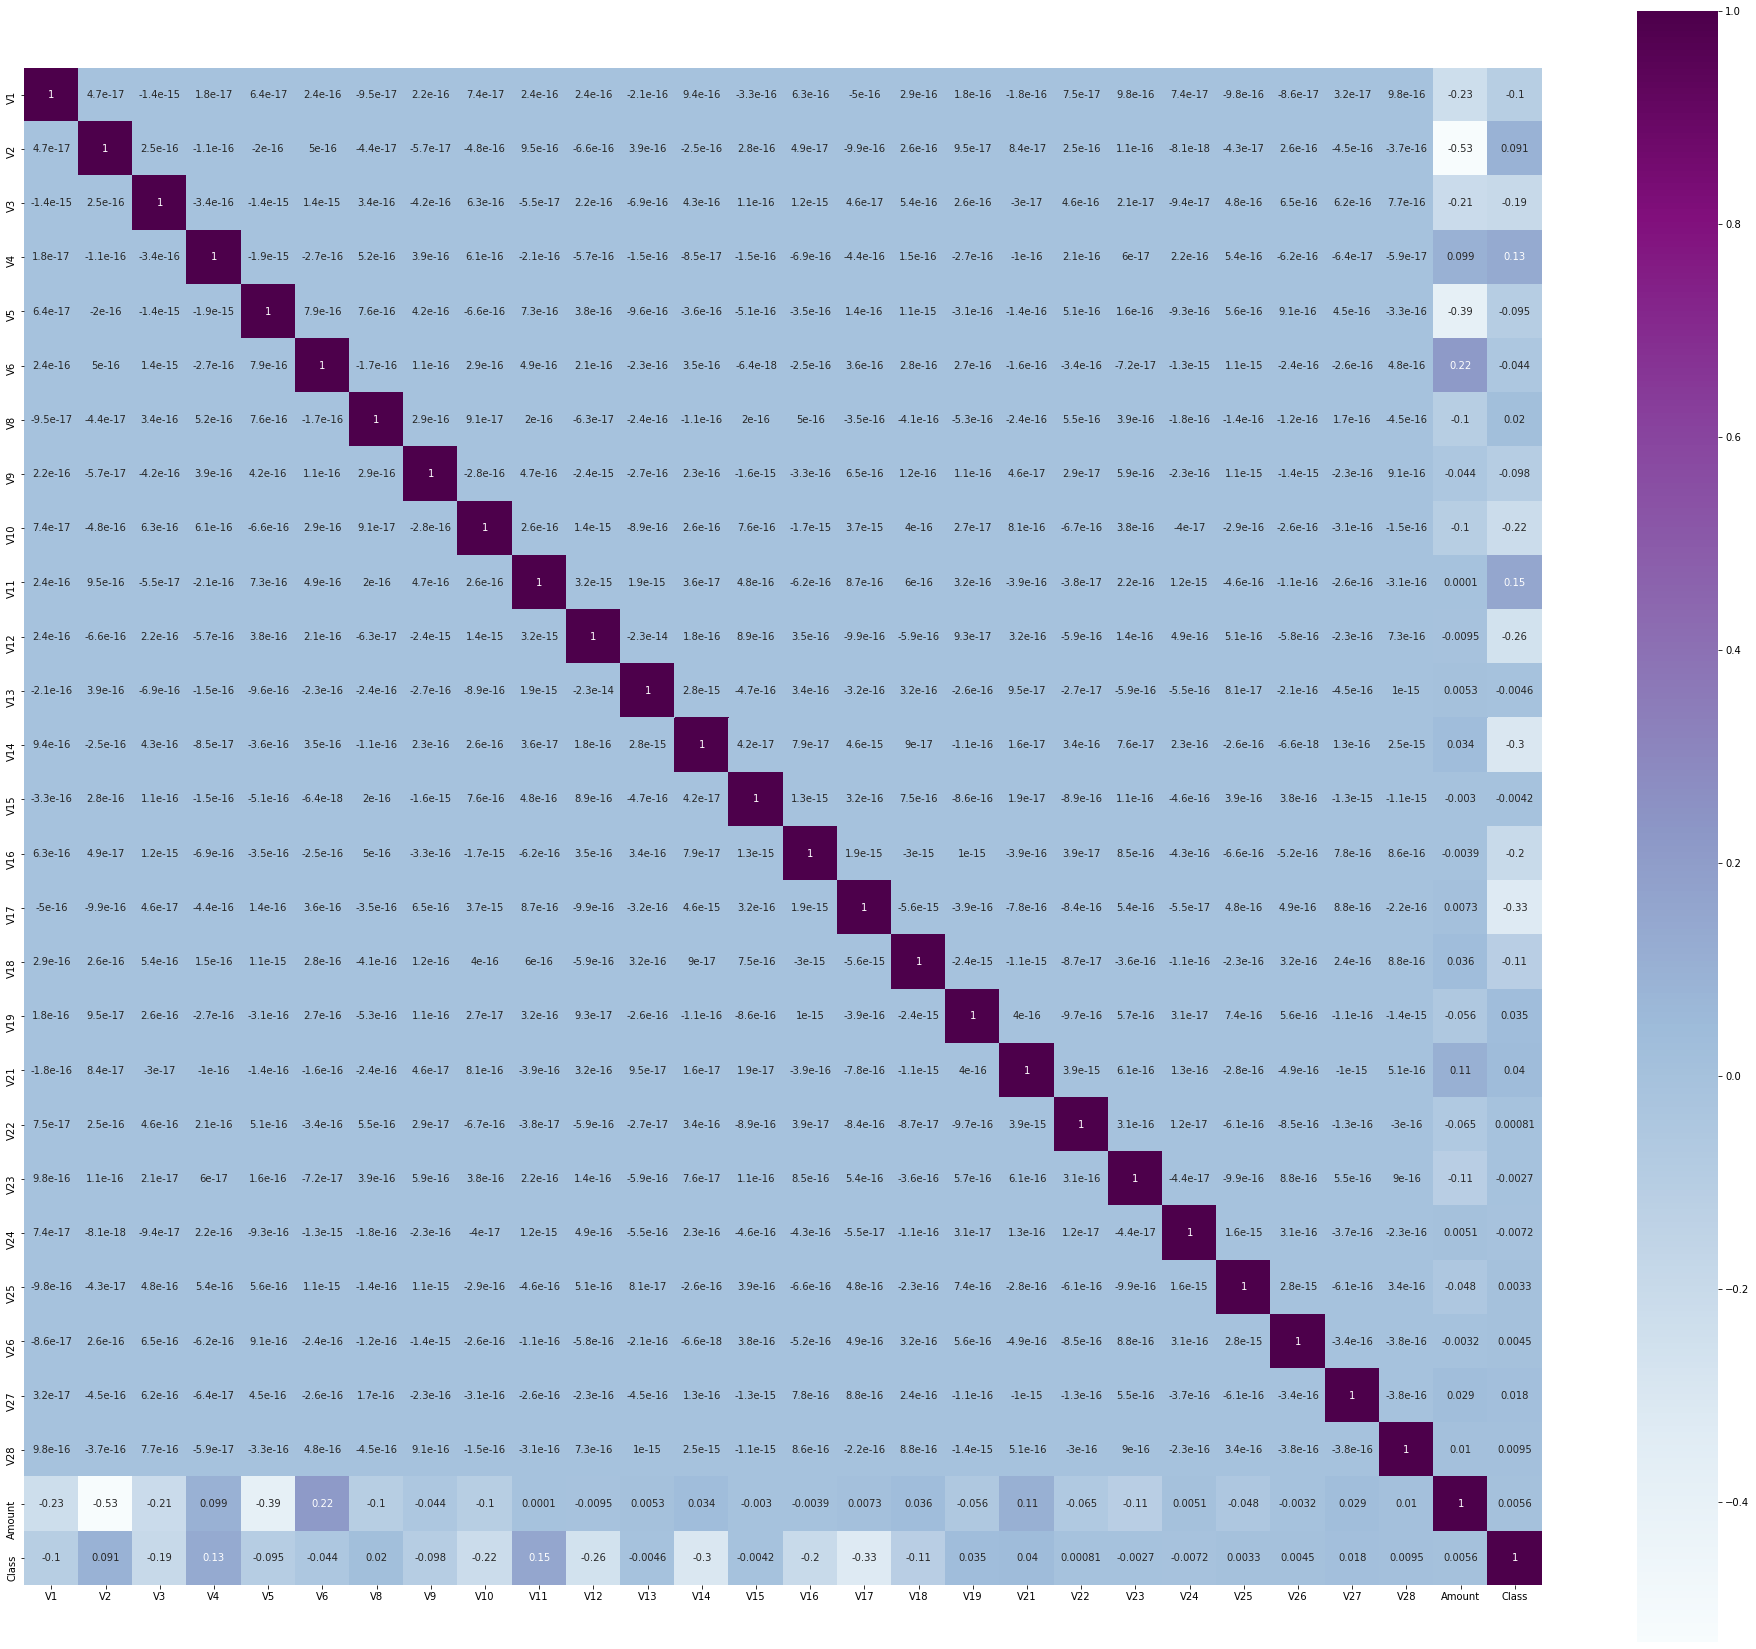

In [21]:
colormap = plt.cm.BuPu

plt.figure(figsize=(34,30))

sns.heatmap(df_credit.corr(),vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

In [22]:
df_credit=df_credit.drop("V2",axis=1)
#can also be done by reassigning dt as dt.iloc(:,2:)
df_credit.head()

,V1,V3,V4,V5,V6,V8,V9,V10,V11,V12,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,2.536347,1.378155,-0.338321,0.462388,0.098698,0.363787,0.090794,-0.551600,-0.617801,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.166480,0.448154,0.060018,-0.082361,0.085102,-0.255425,-0.166974,1.612727,1.065235,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,1.773209,0.379780,-0.503198,1.800499,0.247676,-1.514654,0.207643,0.624501,0.066084,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,1.792993,-0.863291,-0.010309,1.247203,0.377436,-1.387024,-0.054952,-0.226487,0.178228,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,1.548718,0.403034,-0.407193,0.095921,-0.270533,0.817739,0.753074,-0.822843,0.538196,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df_credit=df_credit.drop("V5",axis=1)
#can also be done by reassigning dt as dt.iloc(:,2:)
df_credit.head()

,V1,V3,V4,V6,V8,V9,V10,V11,V12,V13,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,2.536347,1.378155,0.462388,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.166480,0.448154,-0.082361,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,1.773209,0.379780,1.800499,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,1.792993,-0.863291,1.247203,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,1.548718,0.403034,0.095921,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
df_credit=df_credit.drop("V9",axis=1)
#can also be done by reassigning dt as dt.iloc(:,2:)
df_credit.head()

,V1,V3,V4,V6,V8,V10,V11,V12,V13,V14,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,2.536347,1.378155,0.462388,0.098698,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.166480,0.448154,-0.082361,0.085102,-0.166974,1.612727,1.065235,0.489095,-0.143772,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,1.773209,0.379780,1.800499,0.247676,0.207643,0.624501,0.066084,0.717293,-0.165946,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,1.792993,-0.863291,1.247203,0.377436,-0.054952,-0.226487,0.178228,0.507757,-0.287924,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,1.548718,0.403034,0.095921,-0.270533,0.753074,-0.822843,0.538196,1.345852,-1.119670,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


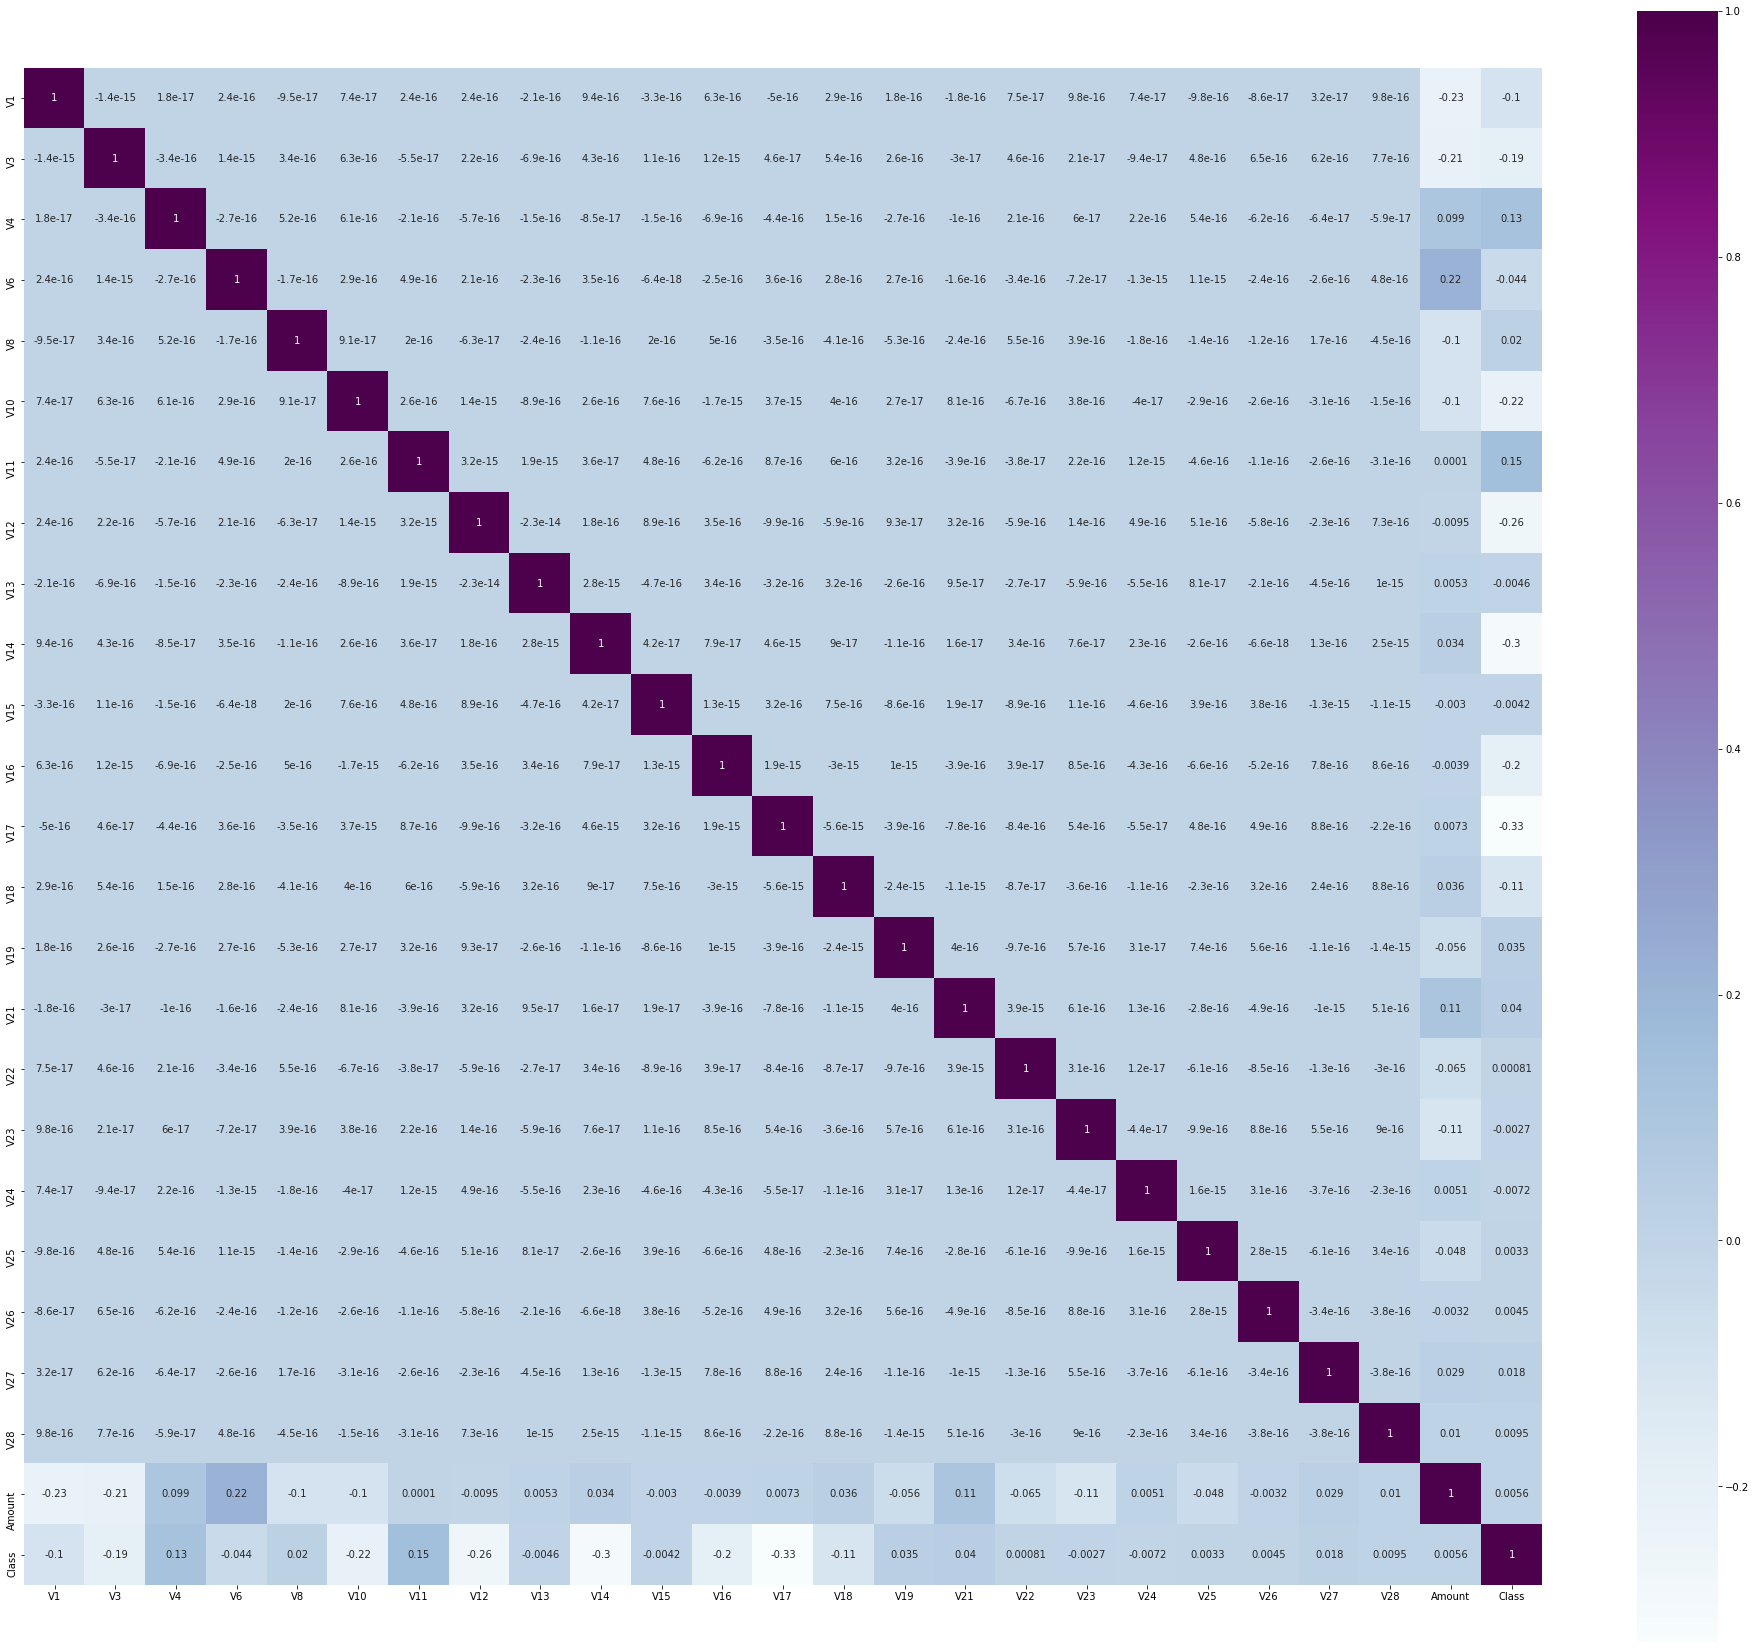

In [25]:
colormap = plt.cm.BuPu

plt.figure(figsize=(34,30))

sns.heatmap(df_credit.corr(),vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

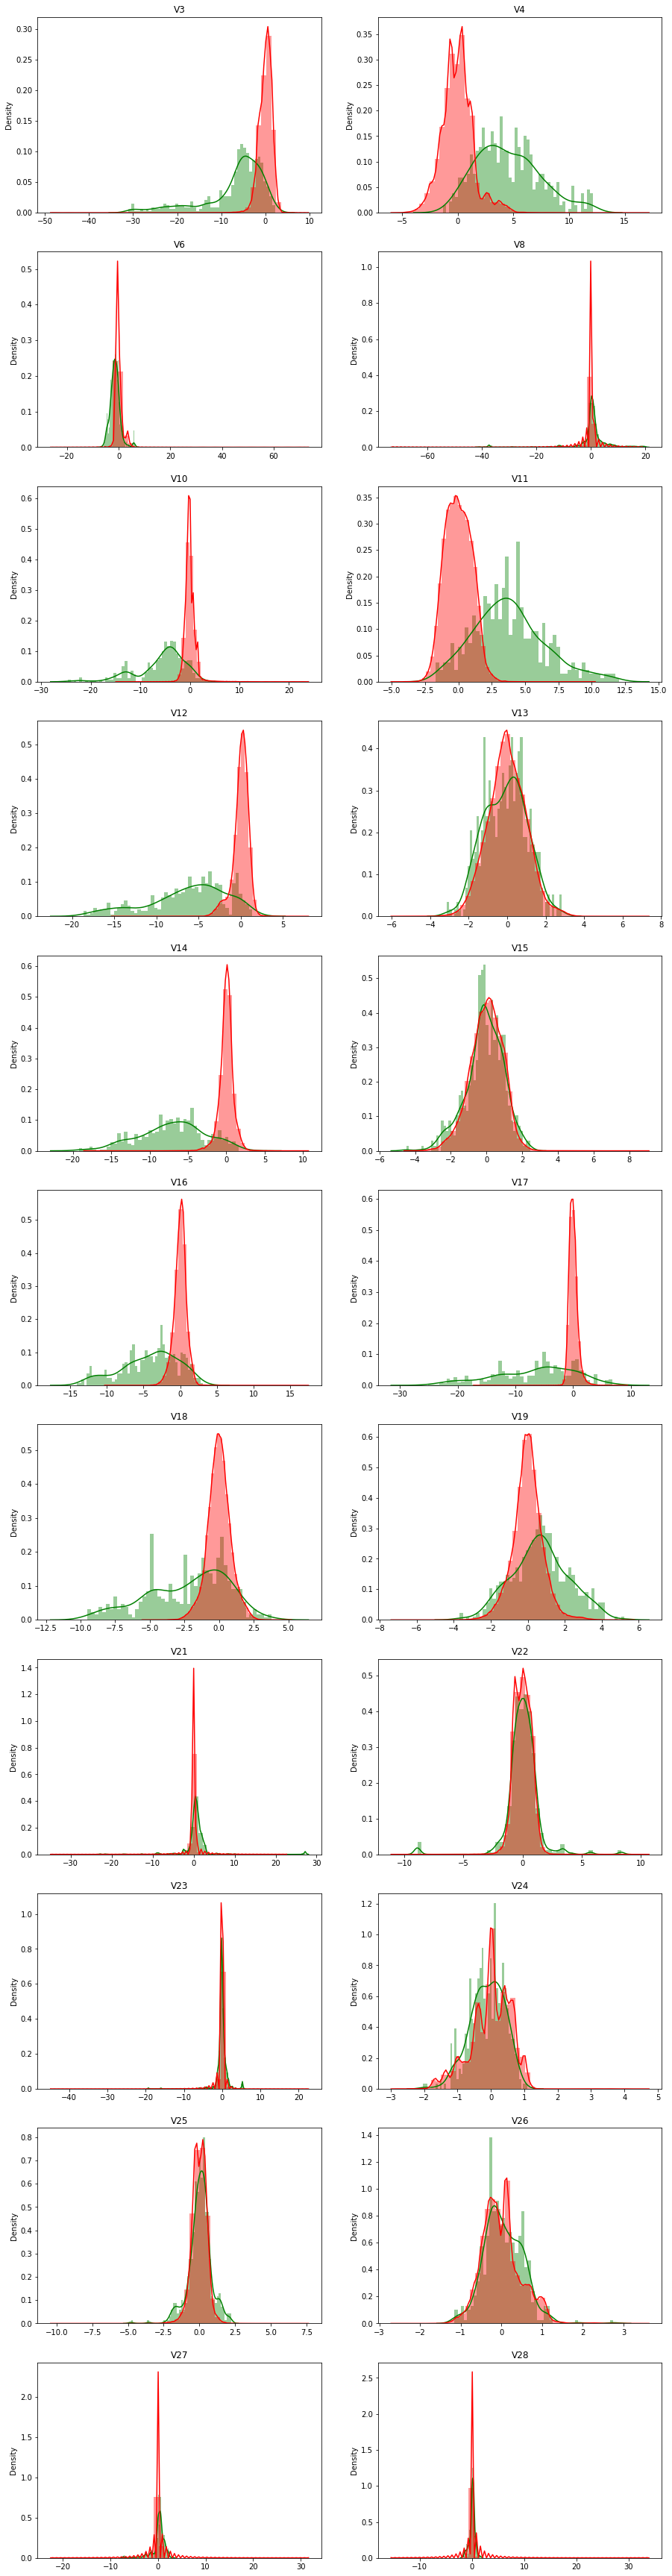

In [26]:
#Checking the distribution of the columns and the spread over the two classes
import matplotlib.gridspec as gridspec
columns = df_credit.iloc[:,1:23].columns

frauds = df_credit.Class == 1
normals = df_credit.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_credit[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_credit[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df_credit[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [27]:
#spliting the data into test and train set
y = df_credit.pop('Class')
X = df_credit
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
print(yTrain.value_counts())
print(yTest.value_counts())
# proportion
print(yTrain.value_counts(normalize=True))
print(yTest.value_counts(normalize=True))

0    227454
1       391
Name: Class, dtype: int64
0    56861
1      101
Name: Class, dtype: int64
0    0.998284
1    0.001716
Name: Class, dtype: float64
0    0.998227
1    0.001773
Name: Class, dtype: float64


In [29]:
# Applying PowerTransformer to fit & transform the train & test data to make the data less skewed
pt=PowerTransformer(method='yeo-johnson', standardize=True,copy=False)
pt.fit(xTrain)
xTrain_pt= pt.transform(xTrain)
pt.fit(xTest)
xTest_pt= pt.transform(xTest)

In [30]:
#converting power transformed data to Dataframe
X_train_pt = pd.DataFrame(data=xTrain_pt,columns= ['V1','V3','V4','V6','V8','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V21',
                                                   'V22','V23','V24','V25','V26','V27','V28','Amount'])
X_test_pt = pd.DataFrame(data=xTest_pt,columns= ['V1','V3','V4','V6','V8','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V21',
                                                   'V22','V23','V24','V25','V26','V27','V28','Amount'])
X_train_pt.head()

,V1,V3,V4,V6,V8,V10,V11,V12,V13,V14,...,V19,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.807646,0.476462,-0.740951,0.730017,-2.516780,-0.756437,-1.319670,-0.054591,-0.861370,-0.156903,...,2.359981,3.857673,-0.751498,0.042844,-1.249836,0.167040,-0.905415,0.575031,-0.213244,-0.280622
1,0.656728,0.204324,-0.044962,-0.042000,-0.027523,0.027678,0.893793,0.928564,0.477337,0.128705,...,0.619691,-0.222600,-0.798313,0.048833,-0.584288,0.103153,1.567741,-0.196612,0.017178,0.112868
2,1.314296,-0.346983,1.115831,-0.144925,-0.040327,0.047836,-1.418835,0.202256,-1.040944,-0.185266,...,0.187764,-0.729188,-1.687135,0.740375,-0.298712,-0.716282,-2.761269,0.113575,-0.092310,-0.637507
3,1.435918,-1.144296,0.441108,-1.221099,-0.412562,-0.418090,-0.268661,-0.136802,-0.086894,-0.789822,...,-0.613954,0.292243,1.046776,-0.033177,-0.231857,0.423537,-0.117572,-0.021349,-0.089301,-0.863749
4,-0.688211,1.958420,1.990343,0.488222,-0.227751,0.833336,1.645136,-2.071893,0.785010,1.584062,...,1.664895,-0.493536,-0.642501,0.257088,0.313761,-0.820053,-0.064536,-0.901242,-0.530877,-0.959186


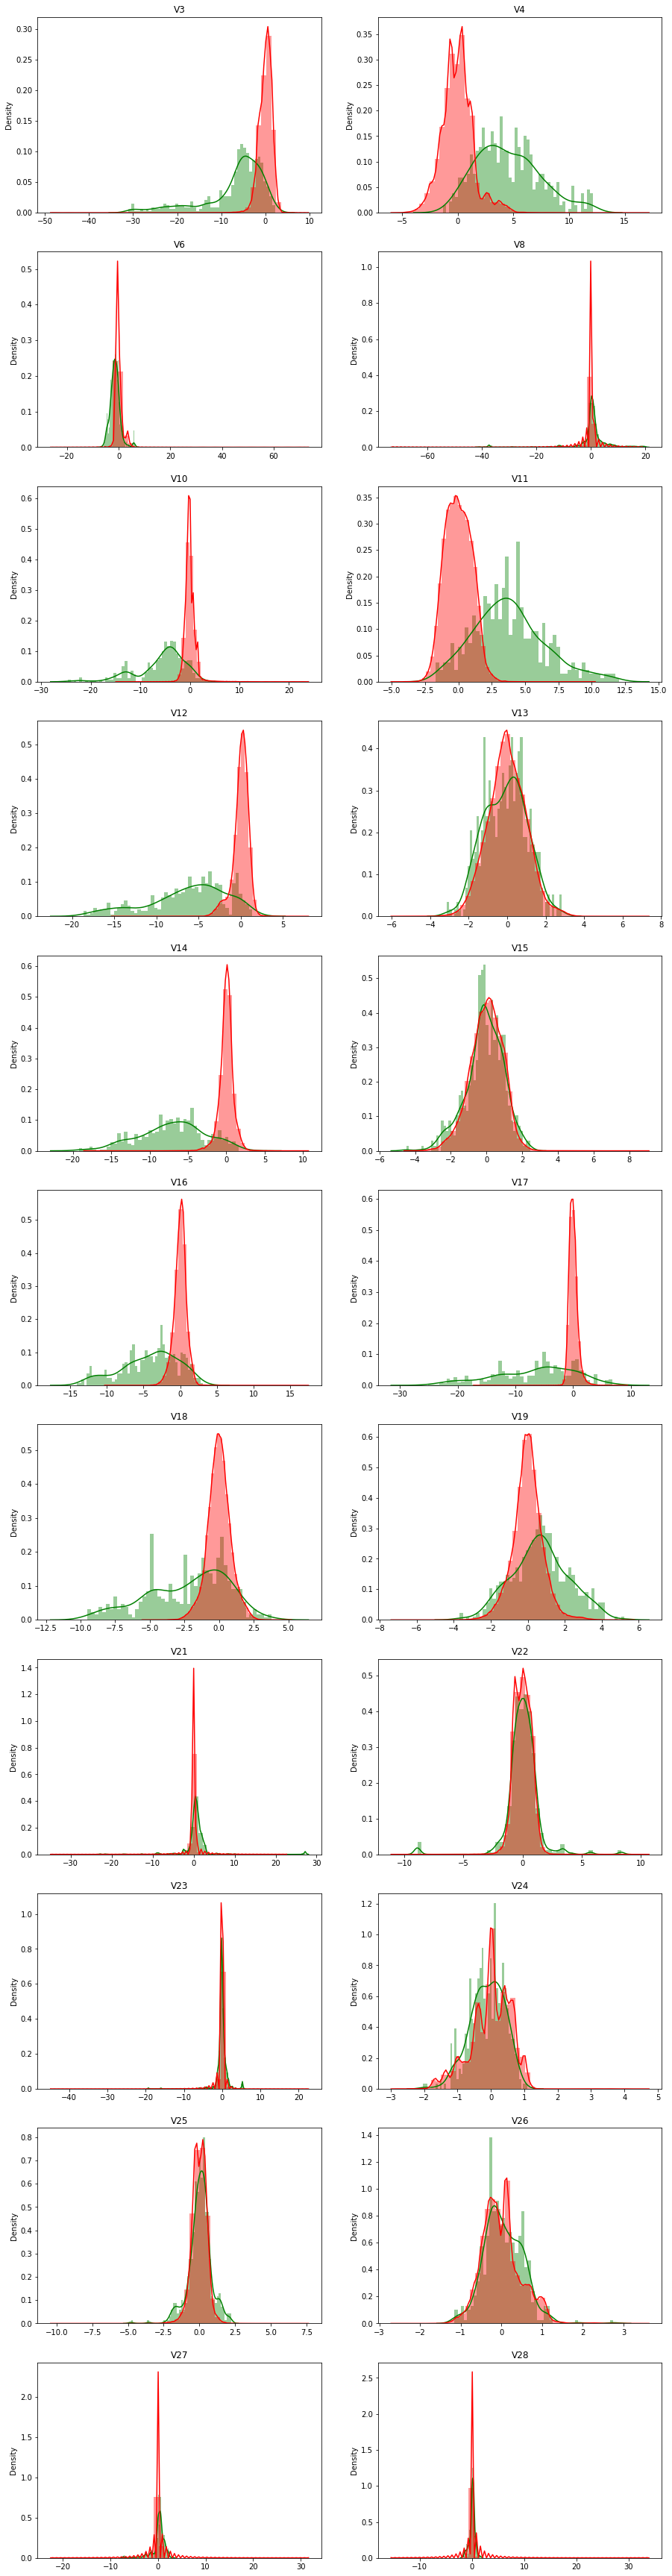

In [31]:
#Checking the spread of daat after using power trsansform
import matplotlib.gridspec as gridspec
columns = df_credit.iloc[:,1:23].columns

#frauds = df_credit.Class == 1
#normals = df_credit.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_credit[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_credit[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df_credit[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [32]:

#defining functions to print results , roc curve and calculatin auc 
def roc_plot(fpr,tpr):
    plt.plot(tpr, fpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.legend()
    plt.show()
def test_auc_roc_classification_score(clf,xTest,yTest):
    probs = clf.predict_proba(xTest)
    probs = probs[:, 1]
    auc = roc_auc_score(yTest, probs)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(yTest,probs, pos_label=0)
    roc_plot(fpr,tpr)
    predicted=clf.predict(xTest)
    report = classification_report(yTest, predicted)
    print(report)
    return auc
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))


## OverSampling Techniques

Using oversampling techniques to handle the imbalanced data. Imbalanced data can mislead the accuracy of a model.

**SMOTE**

Distribuition of Normal(0) and Frauds(1): 
1    227454
0    227454
Name: Class, dtype: int64


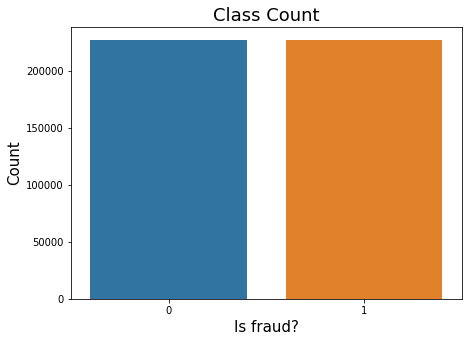

In [33]:
sm =SMOTE(random_state=27)
X_train_sm, y_train_sm = sm.fit_sample(X_train_pt, yTrain)
#Lets start looking the difference by Normal and Fraud transactions after performing SMOTE
print("Distribuition of Normal(0) and Frauds(1): ")
print(y_train_sm.value_counts())

plt.figure(figsize=(7,5))
sns.countplot(y_train_sm)
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

**ADASYN**

Distribuition of Normal(0) and Frauds(1): 
1    227469
0    227454
Name: Class, dtype: int64


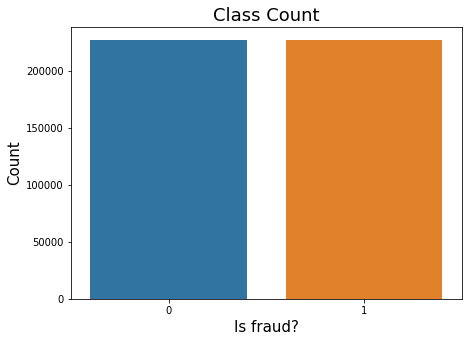

In [34]:
ada = ADASYN(random_state=27)
X_train_ada, y_train_ada = ada.fit_sample(X_train_pt, yTrain)
#Lets start looking the difference by Normal and Fraud transactions  after using ADASYN
print("Distribuition of Normal(0) and Frauds(1): ")
print(y_train_ada.value_counts())

plt.figure(figsize=(7,5))
sns.countplot(y_train_ada)
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

# Random Forest

In [35]:
#create RF on raw data 
from collections import Counter
rf = RandomForestClassifier()
rf.fit(X_train_pt, yTrain)
y_pred = rf.predict(X_test_pt)
print(confusion_matrix(yTest, y_pred))
print_results("Random forest", yTest, y_pred)

[[56854     7]
 [   23    78]]
Random forest
accuracy: 0.9994733330992591
precision: 0.9176470588235294
recall: 0.7722772277227723
f2: 0.7975460122699386


In [36]:
y_pred_prob = rf.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)

AUC: 0.96


We can see accuracy is more than 99% but we cannot trust the model as the data is highly imbalanced. Lets check with Smote data

## Random Forest +SMOTE

In [37]:
smote = RandomForestClassifier().fit(X_train_sm, y_train_sm)
smote_pred = smote.predict(X_test_pt)

# Checking accuracy
accuracy_score(yTest, smote_pred)
y_pred_prob = smote.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)

AUC: 0.98


In [38]:
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))


normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


In [39]:
print("Confusion Matrix: ")
print(confusion_matrix(yTest, smote_pred))

#print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test_pt, yTest)))

print_results("\nSMOTE + RandomForest classification", yTest, smote_pred)

Confusion Matrix: 
[[56847    14]
 [   15    86]]

SMOTE + RandomForest classification
accuracy: 0.9994908886626171
precision: 0.86
recall: 0.8514851485148515
f2: 0.853174603174603


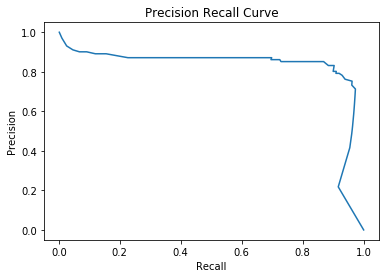

In [40]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote.predict_proba(X_test_pt)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

AUC: 0.98


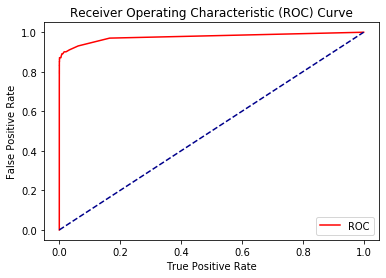

In [41]:

auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)
fpr,tpr,thresholds = roc_curve(yTest,y_pred_prob,pos_label=0)
roc_plot(fpr,tpr)

AUC is 98% but it is overfitting lets resolve the issue of overfitting by hyperparameter tuning using grid search 

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [43]:
#params of the model
param_grid = {"max_depth": [3,5,6],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [46]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train_sm, y_train_sm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.6s finished
[Parallel(n_jobs=1)]: Us

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, 6], 'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='precision')

In [47]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9968021261294229
{'max_depth': 5, 'max_features': 5, 'n_estimators': 10}


In [48]:
# fit the model with hyperparameter chosen by Grid search
rf = RandomForestClassifier(max_features = 6, n_estimators = 10)
rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(max_features=6, n_estimators=10)

In [49]:
#Testing the model 
#Predicting by X_test
y_pred = rf.predict(X_test_pt)

print(confusion_matrix(yTest, y_pred))
print_results("RF classification", yTest, y_pred)

[[56845    16]
 [   18    83]]
RF classification
accuracy: 0.999403110845827
precision: 0.8383838383838383
recall: 0.8217821782178217
f2: 0.8250497017892644


AUC: 0.94


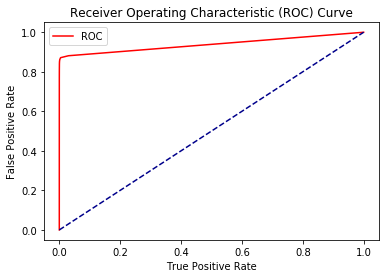

In [50]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)
fpr,tpr,thresholds = roc_curve(yTest,y_pred_prob,pos_label=0)

roc_plot(fpr,tpr)

## RF+ADASYN

In [51]:
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_adasyn, y_adasyn = ADASYN().fit_sample(X, y)
print("ADASYN data distribution: {}".format(Counter(y_adasyn)))

normal data distribution: Counter({0: 284315, 1: 492})
ADASYN data distribution: Counter({0: 284315, 1: 284234})


In [52]:
adasyn = RandomForestClassifier().fit(X_train_ada, y_train_ada)
adasyn_pred = adasyn.predict(X_test_pt)

# Checking accuracy
accuracy_score(yTest, adasyn_pred)
y_pred_prob = adasyn.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)

AUC: 0.97


In [53]:
print_results("RF classification without hyperparameter tuning", yTest, y_pred)

RF classification without hyperparameter tuning
accuracy: 0.999403110845827
precision: 0.8383838383838383
recall: 0.8217821782178217
f2: 0.8250497017892644


In [54]:
param_grid = {"max_depth": [3,5,9],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model_1 = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [57]:
# Running the fit
rf = RandomForestClassifier(max_features = 6, n_estimators = 10)
rf.fit(X_train_ada,y_train_ada)

RandomForestClassifier(max_features=6, n_estimators=10)

In [58]:
#Testing the model 
#Predicting by X_test
y_pred = rf.predict(X_test_pt)

print(confusion_matrix(yTest, y_pred))
print_results("RF classification", yTest, y_pred)

[[56840    21]
 [   19    82]]
RF classification
accuracy: 0.9992977774656788
precision: 0.7961165048543689
recall: 0.8118811881188119
f2: 0.8086785009861933


AUC: 0.95


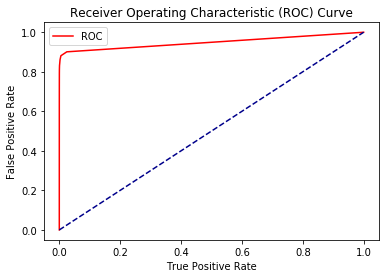

In [59]:
y_pred_prob = rf.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)
fpr,tpr,thresholds = roc_curve(yTest,y_pred_prob,pos_label=0)
roc_plot(fpr,tpr)

## KNN

In [60]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train_pt,yTrain)
knn_predicted_test_labels=knn.predict(X_train_pt)

In [61]:
y_pred = knn.predict(X_test_pt)
print(confusion_matrix(yTest, y_pred))
print_results("KNN", yTest, y_pred)

[[56853     8]
 [   21    80]]
KNN
accuracy: 0.9994908886626171
precision: 0.9090909090909091
recall: 0.7920792079207921
f2: 0.8130081300813008


In [62]:
y_pred_prob = knn.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)

AUC: 0.93


## KNN + SMOTE

In [63]:
smote = KNeighborsClassifier().fit(X_train_sm, y_train_sm)
smote_pred = smote.predict(X_test_pt)

# Checking accuracy
accuracy_score(yTest, smote_pred)
y_pred_prob = smote.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)

AUC: 0.95


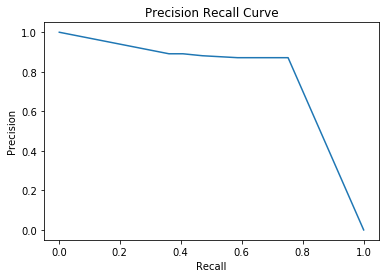

In [64]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote.predict_proba(X_test_pt)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [65]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(20,40))
n_neighbors = list(range(1,10))
p=[1,2]

In [66]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [69]:
# Running the fit
knn_1 = KNeighborsClassifier(leaf_size= 30,n_neighbors= 5)
knn_1.fit(X_train_sm,y_train_sm)

KNeighborsClassifier()

In [70]:
#Testing the model 
#Predicting by X_test
y_pred = knn_1.predict(X_test_pt)
print(confusion_matrix(yTest, y_pred))
print_results("RF classification", yTest, y_pred)

[[56761   100]
 [   12    89]]
RF classification
accuracy: 0.9980337769039008
precision: 0.4708994708994709
recall: 0.8811881188118812
f2: 0.7504215851602023


AUC: 0.95


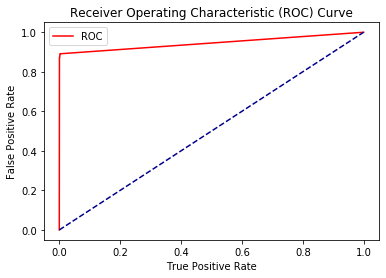

In [71]:
y_pred_prob = knn_1.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)
fpr,tpr,thresholds = roc_curve(yTest,y_pred_prob,pos_label=0)
roc_plot(fpr,tpr)

## KNN + ADASYN

In [72]:
##Making the KNN model for ADASYN training dataset
adasyn_knn = KNeighborsClassifier().fit(X_train_ada, y_train_ada)
adasyn_knn_pred = adasyn_knn.predict(X_test_pt)

# Checking accuracy
accuracy_score(yTest, adasyn_knn_pred)
y_pred_prob = adasyn_knn.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)

AUC: 0.95


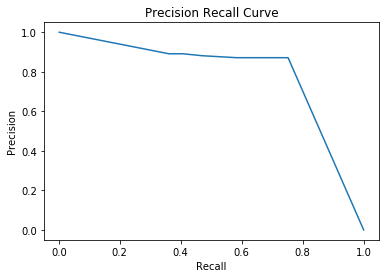

In [73]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = adasyn_knn.predict_proba(X_test_pt)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(yTest, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [74]:
# Running the fit
knn_2= KNeighborsClassifier(leaf_size= 35,n_neighbors= 5)
knn_2.fit(X_train_ada,y_train_ada)

KNeighborsClassifier(leaf_size=35)

In [75]:
#Testing the model 
#Predicting by X_test
y_pred = knn_2.predict(X_test_pt)
print(confusion_matrix(yTest, y_pred))
print_results("RF classification", yTest, y_pred)

[[56761   100]
 [   12    89]]
RF classification
accuracy: 0.9980337769039008
precision: 0.4708994708994709
recall: 0.8811881188118812
f2: 0.7504215851602023


AUC: 0.95


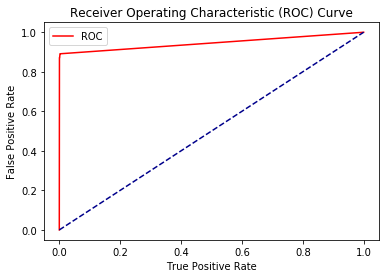

In [76]:
y_pred_prob = knn_2.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)
fpr,tpr,thresholds = roc_curve(yTest,y_pred_prob,pos_label=0)
roc_plot(fpr,tpr)

# XGBOOST

In [77]:
# XGBoost CV model
model = xgb.XGBClassifier()
model.fit(X_train_pt,yTrain)
y_pred = rf.predict(X_test_pt)
print(confusion_matrix(yTest, y_pred))
print_results("Random forest", yTest, y_pred)

C:\Users\rajiv\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:12:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[56840    21]
 [   19    82]]
Random forest
accuracy: 0.9992977774656788
precision: 0.7961165048543689
recall: 0.8118811881188119
f2: 0.8086785009861933


In [78]:
y_pred_prob = rf.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)

AUC: 0.95


## XGBOOST +SMOTE

In [80]:
smote = xgb.XGBClassifier().fit(X_train_sm, y_train_sm)
smote_pred = smote.predict(X_test_pt)

# Checking accuracy
accuracy_score(yTest, smote_pred)
y_pred_prob = smote.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)

C:\Users\rajiv\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:20:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 0.97


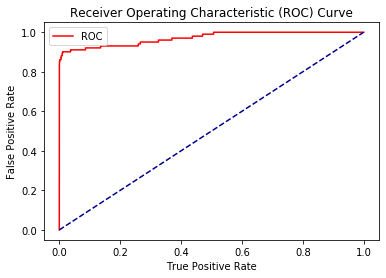

In [81]:
fpr,tpr,thresholds = roc_curve(yTest,y_pred_prob,pos_label=0)
roc_plot(fpr,tpr)

In [82]:
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


In [83]:
print("Confusion Matrix: ")
print(confusion_matrix(yTest, smote_pred))

#print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test_pt, yTest)))

print_results("\nSMOTE + RandomForest classification", yTest, smote_pred)

Confusion Matrix: 
[[56796    65]
 [   15    86]]

SMOTE + RandomForest classification
accuracy: 0.9985955549313578
precision: 0.5695364238410596
recall: 0.8514851485148515
f2: 0.7747747747747747


In [86]:
# performing grid search to get the best parameters 
param_test = {'learning_rate':[0.1,0.001],'max_depth':range(3,10,2), 'min_child_weight':range(1,6,2)}
gridsearch_xgb = GridSearchCV(estimator = xgb.XGBClassifier(n_estimators=140, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gridsearch_xgb.fit(X_train_sm, y_train_sm)

C:\Users\rajiv\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:18:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_

In [87]:
print(gridsearch_xgb.best_score_)
print(gridsearch_xgb.best_params_)

0.9999885473444452
{'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1}


In [88]:
# Running the fit
xgb_1 = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
xgb_1.fit(X_train_sm,y_train_sm)

[19:21:32] WARNING: ..\src\learner.cc:541: 
Parameters: { cv, iid, scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:21:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, cv=5, gamma=0,
              gpu_id=-1, iid=False, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=4, nthread=4,
              num_parallel_tree=1, random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, scoring='roc_auc', seed=27, subsample=0.8,
              tree_method='exact', validate_parameters=1, ...)

In [89]:
#Testing the model 
#Predicting by X_test
y_pred = xgb_1.predict(X_test_pt)

print(confusion_matrix(yTest, y_pred))
print_results("RF classification", yTest, y_pred)

[[56807    54]
 [   14    87]]
RF classification
accuracy: 0.9988062216916541
precision: 0.6170212765957447
recall: 0.8613861386138614
f2: 0.798165137614679


AUC: 0.97


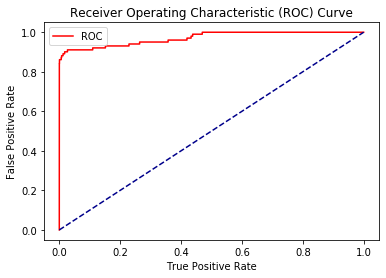

In [90]:
y_pred_prob = xgb_1.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)
fpr,tpr,thresholds = roc_curve(yTest,y_pred_prob,pos_label=0)
roc_plot(fpr,tpr)

## XGBOOST+ADASYN

In [91]:
adasyn_xgb = xgb.XGBClassifier().fit(X_train_ada, y_train_ada)
adasyn_pred_xgb = adasyn_xgb.predict(X_test_pt)

# Checking accuracy
accuracy_score(yTest, adasyn_pred_xgb)
y_pred_prob = adasyn_xgb.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)

C:\Users\rajiv\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 0.96


In [92]:
print_results("RF classification without hyperparameter tuning", yTest, y_pred)

RF classification without hyperparameter tuning
accuracy: 0.9988062216916541
precision: 0.6170212765957447
recall: 0.8613861386138614
f2: 0.798165137614679


In [93]:
# Running the fit
xgb_2 = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=9,min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
xgb_2.fit(X_train_ada,y_train_ada)

C:\Users\rajiv\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:26:27] WARNING: ..\src\learner.cc:541: 
Parameters: { cv, iid, scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:26:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, cv=5, gamma=0,
              gpu_id=-1, iid=False, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=140, n_jobs=4, nthread=4,
              num_parallel_tree=1, random_state=27, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, scoring='roc_auc', seed=27, subsample=0.8,
              tree_method='exact', validate_parameters=1, ...)

AUC: 0.97


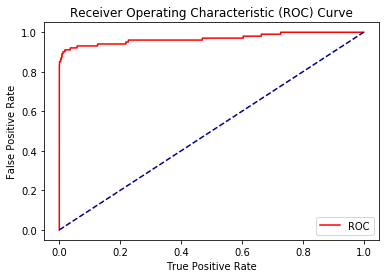

In [94]:
y_pred_prob = xgb_2.predict_proba(X_test_pt)[:,1]
auc = roc_auc_score(yTest, y_pred_prob)    
print('AUC: %.2f'%auc)
fpr,tpr,thresholds = roc_curve(yTest,y_pred_prob,pos_label=0)
roc_plot(fpr,tpr)

## Decision Tree

AUC: 0.88


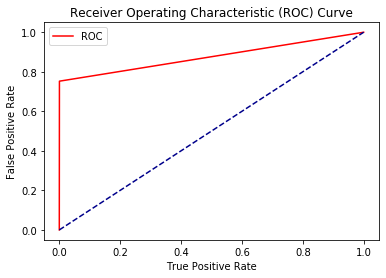

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.75      0.75      0.75       101

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



0.8760089960562156

In [95]:
#Making the decision tree model for original training dataset
clf = tree.DecisionTreeClassifier()

clf = clf.fit(xTrain_pt, yTrain)

test_auc_roc_classification_score(clf,xTest_pt,yTest)

In [96]:
desctree=DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

cnf_matrix_dtree = desctree.fit=desctree.fit(xTrain_pt, yTrain)

AUC: 0.91


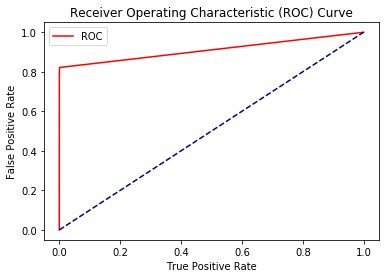

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.84      0.78      0.81       101

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [97]:
auc_dsct=test_auc_roc_classification_score(cnf_matrix_dtree, xTest_pt, yTest)

## Decision Tree + SMOTE

In [98]:
#performing SMOTE on the data set
sm =SMOTE(random_state=27)
X_train_sm, y_train_sm = sm.fit_sample(xTrain_pt, yTrain)

In [99]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(xTrain_pt, yTrain)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [100]:
tree_clf

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [101]:
tree_score = cross_val_score(tree_clf, xTest, yTest, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 99.92%


AUC: 0.96


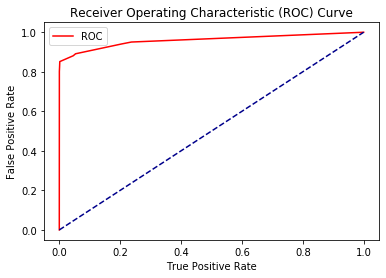

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56861
           1       0.03      0.88      0.06       101

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



0.9594731707215145

In [102]:
#Making the decision tree model for SMOTEtraining dataset
clf = tree.DecisionTreeClassifier(criterion='entropy',
                       max_depth=3,min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

clf = clf.fit(X_train_sm, y_train_sm)

test_auc_roc_classification_score(clf,xTest_pt,yTest)

## Decision Tree + ADASYN

AUC: 0.94


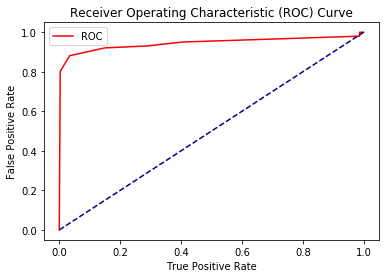

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     56861
           1       0.01      0.92      0.02       101

    accuracy                           0.85     56962
   macro avg       0.51      0.89      0.47     56962
weighted avg       1.00      0.85      0.92     56962



0.9444406813836974

In [103]:
#Making the Decision Tree model for ADASYN training dataset
clf = tree.DecisionTreeClassifier(criterion='entropy',
                       max_depth=3,min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

clf = clf.fit(X_train_ada, y_train_ada)

test_auc_roc_classification_score(clf,xTest_pt,yTest)

## Logistic  Regression

AUC: 0.99


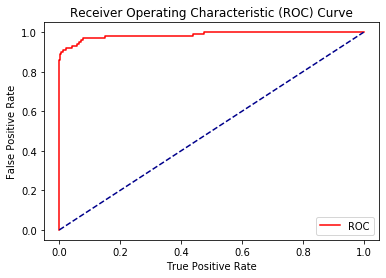

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.90      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.95      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



0.9858310025089845

In [104]:
#Making the Logistic regression model for original training dataset
reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr').fit(xTrain_pt, yTrain)
test_auc_roc_classification_score(reg, xTest_pt, yTest)

## Logistic Regression + SMOTE

AUC: 0.99


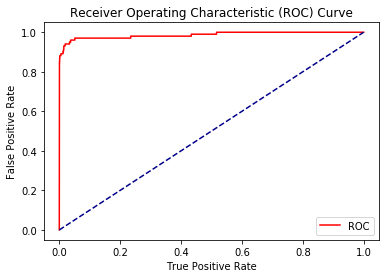

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.06      0.94      0.11       101

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.98     56962



0.9861146540956834

In [105]:
#Making the Logistic Regression model for SMOTEtraining dataset
reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr').fit(X_train_sm, y_train_sm)
test_auc_roc_classification_score(reg, xTest_pt, yTest)

## Logistic Regression + ADASYN

AUC: 0.99


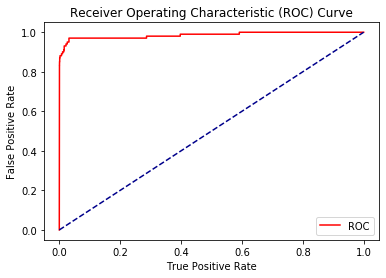

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56861
           1       0.02      0.97      0.03       101

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.94     56962



0.9854397409280683

In [106]:
#Making the Logistic Regression model for ADASYN training dataset
reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr').fit(X_train_ada, y_train_ada)
test_auc_roc_classification_score(reg, xTest_pt, yTest)

## K-fold cross-validation

In [109]:
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10)
reg = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='ovr').fit(X_train_ada, y_train_ada)
#auc_reg=test_auc_roc_classification_score(reg, xTest_pt, yTest)
results_kFold = model_selection.cross_val_score(reg, xTest, yTest, cv =kfold)
print("Acc = %.2f%%" % (results_kFold.mean()*100.0))

Acc = 99.93%


AUC: 0.99


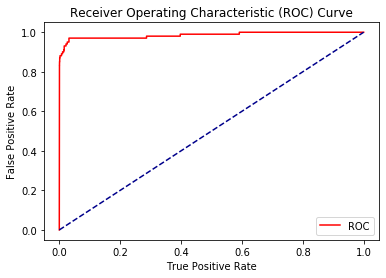

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56861
           1       0.02      0.97      0.03       101

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.94     56962



0.9854397409280683

In [110]:
test_auc_roc_classification_score(reg, xTest_pt, yTest)

After Trying all the different models on normal data power transformed data Oversampled data using ADSYN and oversampled data using SMOTE we choose Decison tree on oversampled data using ADASYN as sthe BEST model as this gives us very good AUC score and good value for other parameters as well, also the data points are not biased or concentrated where the most data points of a type were as this technique oversamples by taking in account the spread as well so this will give us the best results on test data over time.